In [1]:
import scipy.io
import numpy as np

In [2]:
mat = scipy.io.loadmat('train_znamenke.mat')
#print(mat)

A = mat['azip']
print(np.shape(A))

(256, 1707)


In [3]:
mat1 = scipy.io.loadmat('train_correct_output.mat')
#print(mat)

D = mat1['dzip']
print(np.shape(D))
niz = D[0]

(1, 1707)


In [4]:
A[:,0]

array([-1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -0.631,
        0.862, -0.167, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -0.992,  0.297,
        1.   ,  0.307, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -0.41 ,  1.   ,
        0.986, -0.565, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -1.   , -1.   , -0.683,  0.825,  1.   ,
        0.562, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -1.   , -0.938,  0.54 ,  1.   ,  0.778,
       -0.715, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -1.   ,  0.1  ,  1.   ,  0.922, -0.439,
       -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -0.257,  0.95 ,  1.   , -0.162, -1.   ,
       -1.   , -1.   , -0.987, -0.714, -0.832, -1.   , -1.   , -1.   ,
      

In [21]:
#!pip install tensorly

In [5]:
import tensorly as tl

## Slaganje tenzora

In [6]:
'''baze_prostora_znamenki = dict()
l = 30 

for i in range (10):
    J = [j for j, x in enumerate(niz) if x == i] #pokupili smo sve indekse koji imaju neki broj
    B = A[:,J]
    U, S, V = np.linalg.svd(B)
    baze_prostora_znamenki[i] = U[:,0:30]'''
   

In [37]:
#ovo je NOVO !!! 
#23.2.2022.

from tensorly import fold
tensor_list = [None] * 10

#ovdje pamtimo za svaku znamenku tenzore

for i in range (10):
    J = [j for j, x in enumerate(niz) if x == i]
    B = A[:,J] #B nam je skupio sve stupce sa jednom znamenkom i presložili smo u tenzor (16*16*koliko ima znamneki)
    tensor_list[i] = tl.vec_to_tensor(B,(16,16,B.shape[1]))
    #print(tensor_list[i].shape)
    '''for k in range(len(J)):
        B = A[:,J[k]] #stupac koji sadrži znamenku i sad ga samo složimo u tenzor
        two = np.reshape(B, (16,16,1))
        #s = list(tensor_list[i].shape)
        tensor_list[i] = tl.fold(tl.unfold(tensor_list[i],mode=1),two,mode=1,shape =(16,16,1))''' #mislim da ovaj dio nije potreban
        
for i in range(10):
    print(i, '-ti tenzor dan je sa', tensor_list[i].shape) #dimenzije pašu i ispis tenzora paše :) 


0 -ti tenzor dan je sa [[-1.    -1.    -1.    -0.567 -0.064  0.979 -0.009 -0.167 -0.999 -1.
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.     0.405  1.     1.     1.     1.     0.482 -0.701
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -0.242  1.     1.     1.     1.     1.     0.809
   0.351 -0.764 -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -0.091  1.     1.     1.     1.     0.848  1.
   1.     0.748 -0.536 -1.    -1.    -1.   ]
 [-1.    -0.987 -0.71   0.861  1.     1.     1.     1.    -0.105  0.963
   1.     1.     0.625 -0.662 -1.    -1.   ]
 [-1.    -0.476  1.     1.     1.     1.     1.     1.    -0.282 -0.457
   1.     1.     1.     0.481 -0.768 -1.   ]
 [-1.    -0.249  1.     1.     1.     0.859 -0.046 -0.862 -0.962 -0.991
  -0.255  1.     1.     1.     0.046 -1.   ]
 [-0.999  0.588  1.     1.     1.    -0.065 -1.    -1.    -1.    -1.
  -0.942  0.859  1.     1.     0.784 -0.977]
 [-0.788  0.794  1.     1.     0.986 -0.469 -1.   

In [25]:
#dims = (16,16,len(J))
#print(dims)
matrica = np.zeros((16,16))
tensor = tl.fold(matrica,mode=0,shape = (16,16))
print(type(tensor))

<class 'numpy.ndarray'>


## Novi podaci

In [8]:
import gzip
f = gzip.open('t10k-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 5

import numpy as np
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

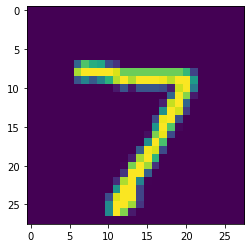

In [9]:
import matplotlib.pyplot as plt
image = np.asarray(data[0]).squeeze()
plt.imshow(image)
plt.show()